## HDDM Analysis of raw reaction times


Models for Drit-Rate (v) and Bias (z) dependent on main effects (Stim and Level) and Conditions
--> 6 Models are estimated

-----
         Main effects:                                Conditions:
----
       Stim:
        - happy                                     - happy 8ms
        - sad                                       - happy 16ms
        - neutral                                   - happy 25ms
                                                    - happy 141ms
        Level:                                      - sad 8ms
        - 141ms                                     - sad 16ms
        - 25ms                                      - sad 25ms
        - 16ms                                      - sad 141ms
        - 8ms                                       - neutral 8ms
                                                    - neutral 16ms
                                                    - neutral 25ms
                                                    - neutral 141ms
                                                    
                                                    

In [1]:
#Load in packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import hddm
print (hddm.__version__)

0.6.0


C:\Users\juhoffmann\Anaconda3\envs\hddm_analysis\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
#Load in dataset
data = hddm.load_csv('/hddm_data.csv')
data = data.drop(['Unnamed: 0'], axis=1) #Drop unnecessary column
data = data.dropna(subset=['rt'])        #Delete NAN
data.head(10)                            #View first 10 rows of dataset

,block,conditions,correct,level,primer_time,real_trial_number,response,rt,stim,study_number,subj_idx,trial
0,0.0,141ms_happy,0.0,141ms,0.149986,1.0,8.0,0.942010,happy,study2,40.0,0.0
1,0.0,141ms_neutral,1.0,141ms,0.149371,8.0,8.0,0.881282,neutral,study2,40.0,7.0
2,0.0,25ms_happy,1.0,25ms,0.024403,10.0,9.0,1.186087,happy,study2,40.0,9.0
3,0.0,141ms_happy,1.0,141ms,0.149931,11.0,9.0,1.103925,happy,study2,40.0,10.0
4,0.0,141ms_sad,1.0,141ms,0.149590,13.0,7.0,0.695511,sad,study2,40.0,12.0
5,0.0,25ms_neutral,1.0,25ms,0.024297,14.0,8.0,1.298704,neutral,study2,40.0,13.0
6,0.0,25ms_happy,1.0,25ms,0.024904,15.0,9.0,0.904844,happy,study2,40.0,14.0
7,0.0,25ms_neutral,0.0,25ms,0.024434,17.0,7.0,1.000534,neutral,study2,40.0,16.0
8,0.0,141ms_neutral,1.0,141ms,0.149260,18.0,8.0,0.919468,neutral,study2,40.0,17.0
9,0.0,25ms_happy,1.0,25ms,0.024766,19.0,9.0,0.833760,happy,study2,40.0,18.0


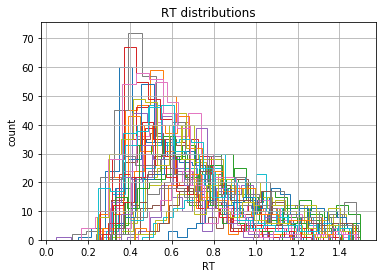

In [3]:
#Draw reaction time distributions
data = hddm.utils.flip_errors(data)
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

# Model for drift-rate depending on conditions
### Gelman Rubin R Statistic for convergence check


In [4]:
models = list()
for i in range(5):                                                      #Estimate Model 5 times
    m = hddm.HDDM(data, p_outlier=0.05,depends_on={'v': 'conditions'})  #Drift-rate v dependent on 12 conditions
    m.find_starting_values() 
    m.sample(100000, burn=500, thin=5)                                  #Draw 10.000 samples, burn first 500, every 5ths sample will be saved
    models.append(m)
hddm.analyze.gelman_rubin(models)                                       #Check for convergence within and between chains

C:\Users\juhoffmann\Anaconda3\envs\hddm_analysis\lib\site-packages\scipy\optimize\optimize.py:1934: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 100000 of 100000 complete in 17737.4 sec

{'a': 1.0006023526310495,
 'a_std': 1.0003818845352772,
 'a_subj.0HZ': 1.0003056891387012,
 'a_subj.1.0': 1.0002281122534842,
 'a_subj.10.0': 1.0001430824723687,
 'a_subj.11.0': 1.0003475472605161,
 'a_subj.14.0': 1.000212689948769,
 'a_subj.15.0': 1.000154842052107,
 'a_subj.16': 1.0001774335632778,
 'a_subj.17.0': 1.000324743491509,
 'a_subj.18': 1.0002056395126235,
 'a_subj.2.0': 1.0002042294091105,
 'a_subj.20.0': 1.0001215952387035,
 'a_subj.21.0': 1.0006292406918773,
 'a_subj.22.0': 1.0001526237356917,
 'a_subj.24.0': 1.000036651847772,
 'a_subj.25.0': 1.0002715826200033,
 'a_subj.27': 1.0000091449626196,
 'a_subj.28.0': 1.0003627571272737,
 'a_subj.29': 1.000198203093063,
 'a_subj.3': 1.0002017452278023,
 'a_subj.30.0': 1.000125254227471,
 'a_subj.32': 1.00011280674846,
 'a_subj.33.0': 0.9999814350051579,
 'a_subj.34.0': 1.0004771277956013,
 'a_subj.36.0': 1.0001520272890998,
 'a_subj.37.0': 1.0005934053473395,
 'a_subj.38.0': 1.0009249701991731,
 'a_subj.39.0': 1.00041210621178

Plotting a
Plotting a_std
Plotting v(141ms_happy)
Plotting v(141ms_neutral)
Plotting v(141ms_sad)
Plotting v(16ms_happy)
Plotting v(16ms_neutral)
Plotting v(16ms_sad)
Plotting v(25ms_happy)
Plotting v(25ms_neutral)
Plotting v(25ms_sad)
Plotting v(8ms_happy)
Plotting v(8ms_neutral)
Plotting v(8ms_sad)
Plotting v_std
Plotting t
Plotting t_std


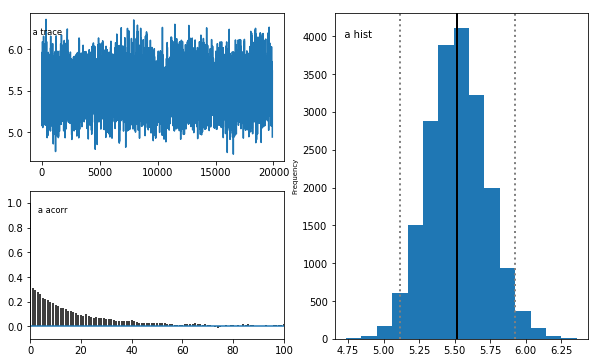

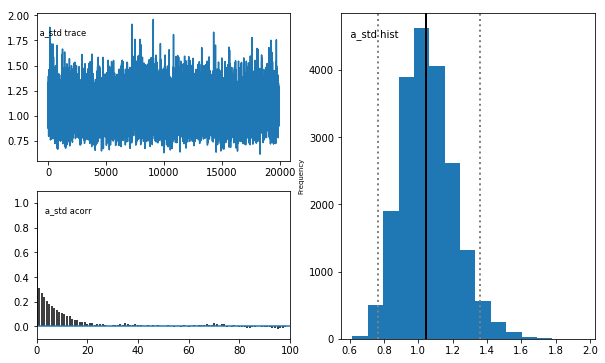

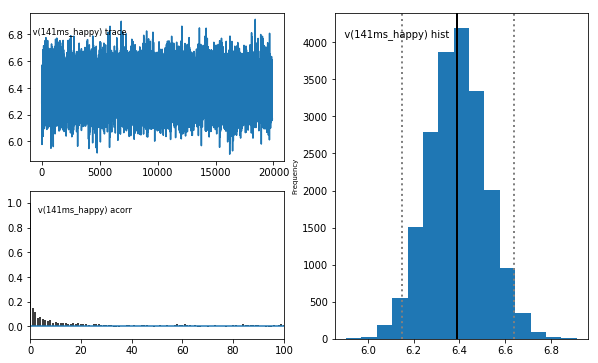

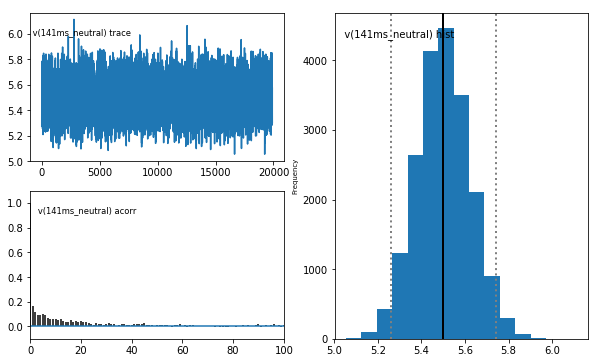

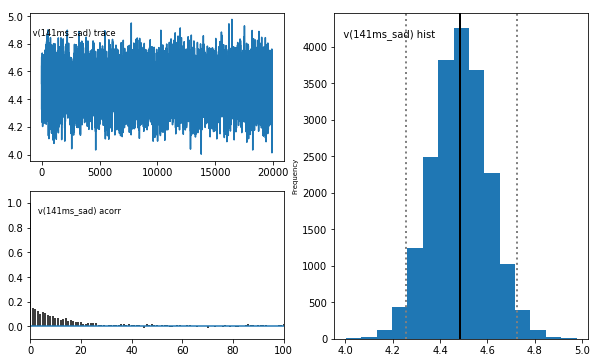

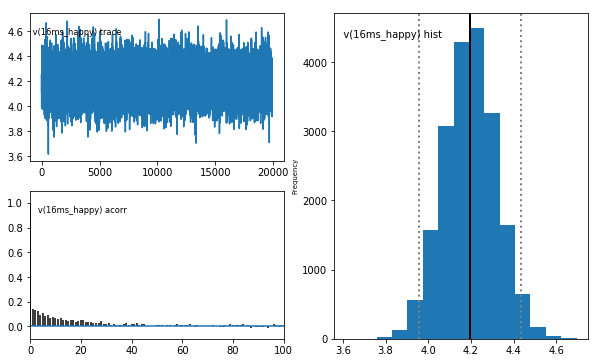

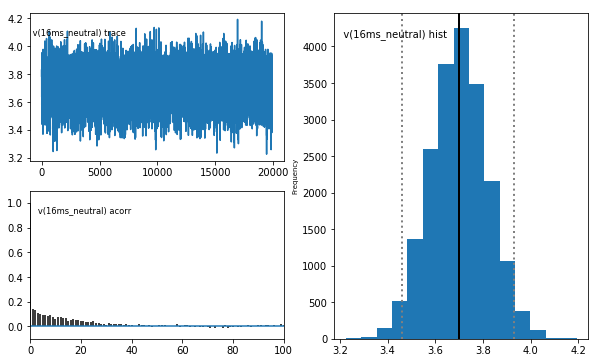

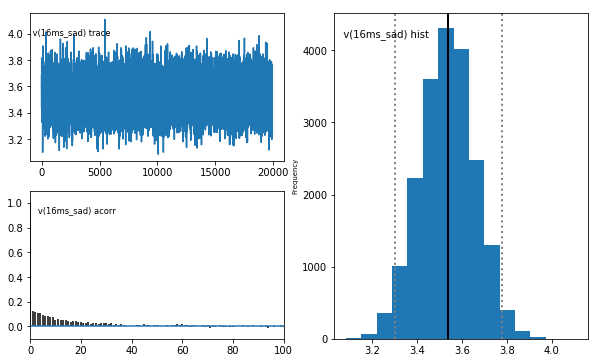

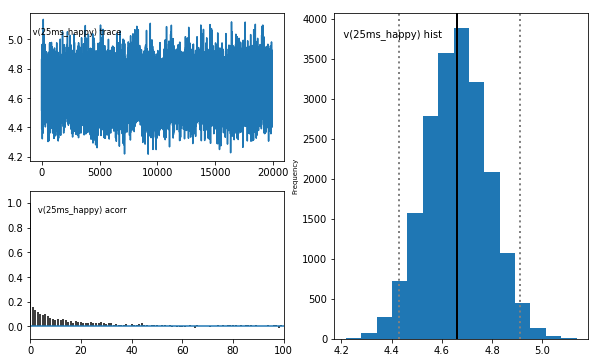

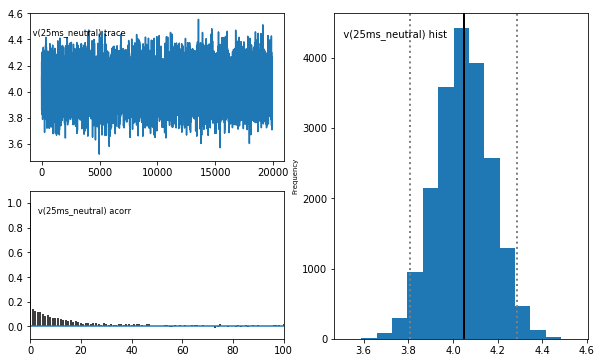

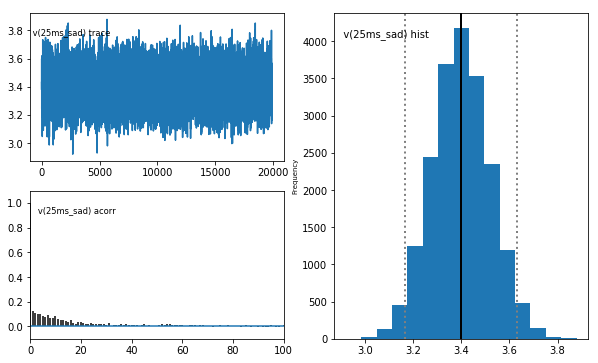

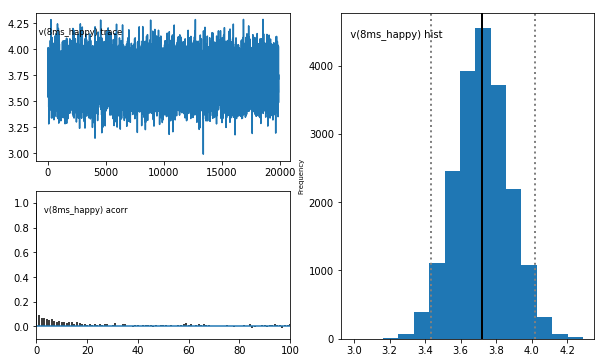

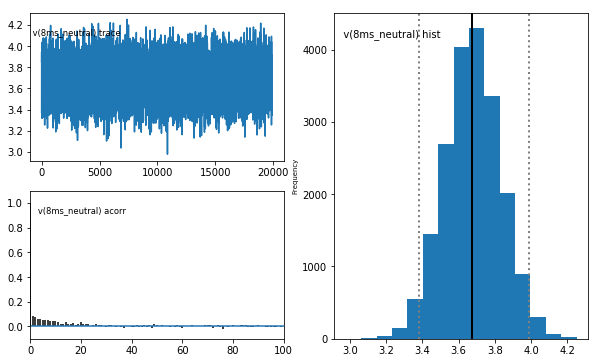

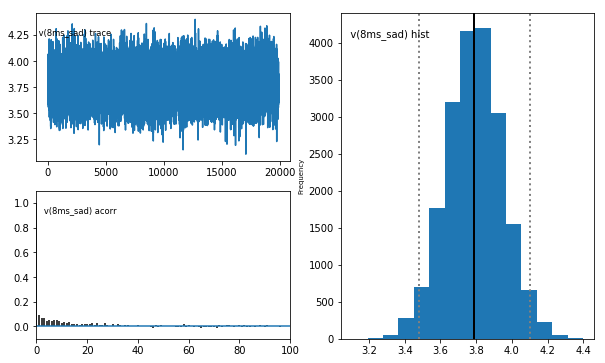

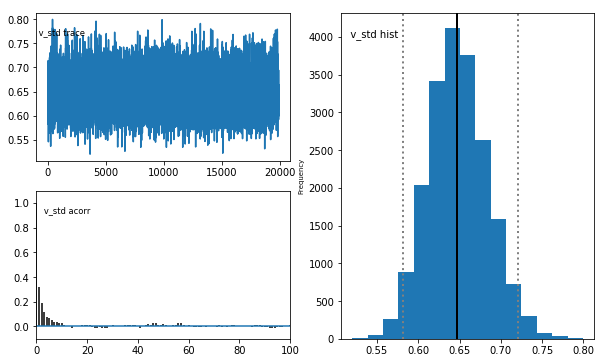

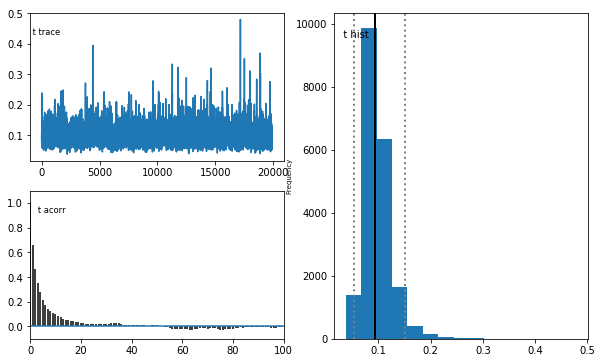

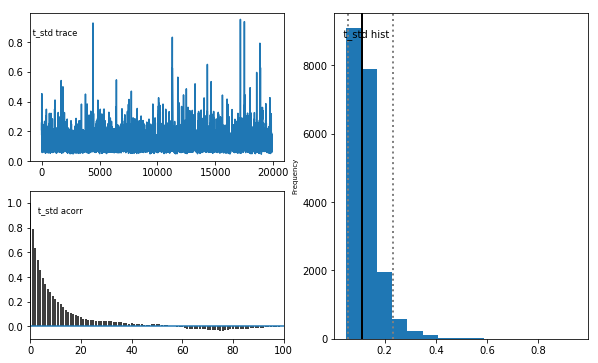

In [5]:
m.plot_posteriors()

In [6]:
m.print_stats()

                                  mean         std         2.5q         25q         50q         75q      97.5q       mc err
a                              5.51885    0.205651      5.12308      5.3785     5.51474     5.65391    5.93534   0.00539491
a_std                          1.05645    0.154366     0.791415    0.947706     1.04442     1.15165     1.3981   0.00280669
a_subj.0HZ                     5.31369    0.257358       4.7397     5.16232     5.33735     5.49277    5.75863   0.00507678
a_subj.1.0                     4.84103    0.367615       4.0768     4.58488      4.8707     5.12122    5.45963   0.00865131
a_subj.10.0                    5.94698    0.267845        5.356     5.78763     5.96769      6.1291    6.41512   0.00490121
a_subj.11.0                    5.33481    0.452411      4.46991     5.00924     5.32818     5.67647    6.16193    0.0138344
a_subj.14.0                    5.85896     0.48185      4.82431     5.54048     5.90699     6.21816    6.65803    0.0111364
a_subj.1

# Plot Drift-Rates for all conditions

In [7]:
import matplotlib.pyplot

(0, 4)

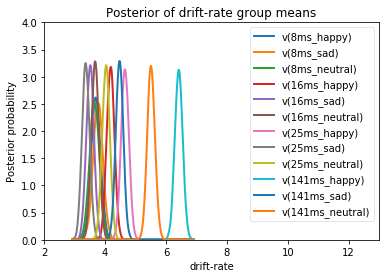

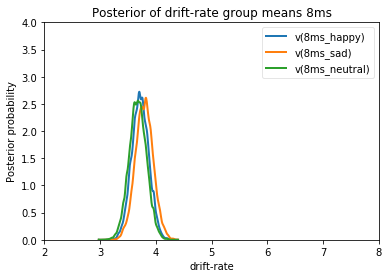

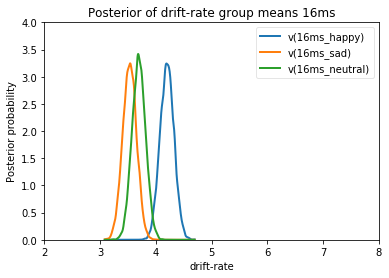

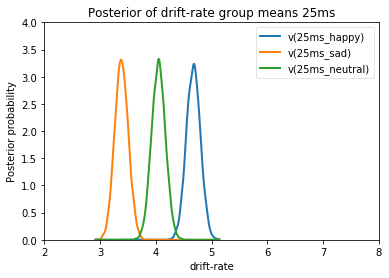

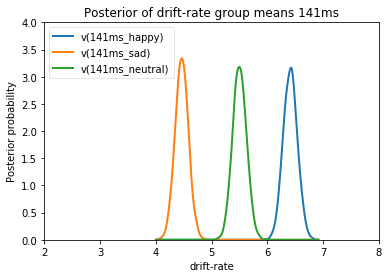

In [8]:
v_8ms_happy, v_8ms_sad, v_8ms_neutral,v_16ms_happy, v_16ms_sad, v_16ms_neutral, v_25ms_happy, v_25ms_sad, v_25ms_neutral, v_141ms_happy, v_141ms_sad, v_141ms_neutral  = m.nodes_db.node[['v(8ms_happy)', 'v(8ms_sad)', 'v(8ms_neutral)','v(16ms_happy)', 'v(16ms_sad)', 'v(16ms_neutral)', 'v(25ms_happy)', 'v(25ms_sad)', 'v(25ms_neutral)', 'v(141ms_happy)', 'v(141ms_sad)', 'v(141ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([v_8ms_happy, v_8ms_sad, v_8ms_neutral,v_16ms_happy, v_16ms_sad, v_16ms_neutral, v_25ms_happy, v_25ms_sad, v_25ms_neutral, v_141ms_happy, v_141ms_sad, v_141ms_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')
plt.xlim(2,13)
plt.ylim(0,4)

v_8ms_happy, v_8ms_sad, v_8ms_neutral= m.nodes_db.node[['v(8ms_happy)', 'v(8ms_sad)', 'v(8ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([v_8ms_happy, v_8ms_sad, v_8ms_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means 8ms')
plt.xlim(2,8)
plt.ylim(0,4)

v_16ms_happy, v_16ms_sad, v_16ms_neutral= m.nodes_db.node[['v(16ms_happy)', 'v(16ms_sad)', 'v(16ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([v_16ms_happy, v_16ms_sad, v_16ms_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means 16ms')
plt.xlim(2,8)
plt.ylim(0,4)

v_25ms_happy, v_25ms_sad, v_25ms_neutral= m.nodes_db.node[['v(25ms_happy)', 'v(25ms_sad)', 'v(25ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([v_25ms_happy, v_25ms_sad, v_25ms_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means 25ms')
plt.xlim(2,8)
plt.ylim(0,4)

v_141ms_happy, v_141ms_sad, v_141ms_neutral= m.nodes_db.node[['v(141ms_happy)', 'v(141ms_sad)', 'v(141ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([v_141ms_happy, v_141ms_sad, v_141ms_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means 141ms')
plt.xlim(2,8)
plt.ylim(0,4)


(0, 4)

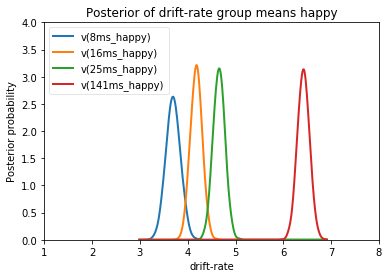

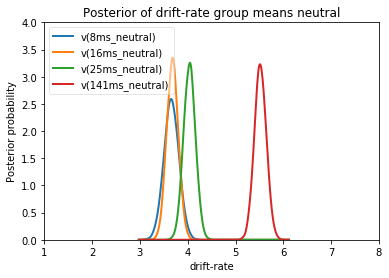

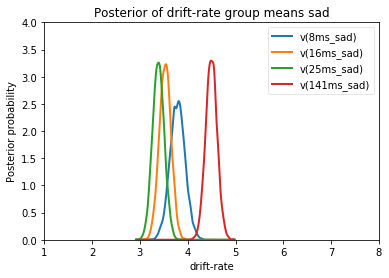

In [9]:
v_8ms_happy, v_16ms_happy, v_25ms_happy, v_141ms_happy= m.nodes_db.node[['v(8ms_happy)', 'v(16ms_happy)', 'v(25ms_happy)', 'v(141ms_happy)']] 
hddm.analyze.plot_posterior_nodes([v_8ms_happy, v_16ms_happy, v_25ms_happy, v_141ms_happy])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means happy')
plt.xlim(1,8)
plt.ylim(0,4)


v_8ms_neutral, v_16ms_neutral, v_25ms_neutral, v_141ms_neutral= m.nodes_db.node[['v(8ms_neutral)', 'v(16ms_neutral)', 'v(25ms_neutral)', 'v(141ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([v_8ms_neutral, v_16ms_neutral, v_25ms_neutral, v_141ms_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means neutral')
plt.xlim(1,8)
plt.ylim(0,4)

v_8ms_sad, v_16ms_sad, v_25ms_sad, v_141ms_sad= m.nodes_db.node[['v(8ms_sad)', 'v(16ms_sad)', 'v(25ms_sad)', 'v(141ms_sad)']] 
hddm.analyze.plot_posterior_nodes([v_8ms_sad, v_16ms_sad, v_25ms_sad, v_141ms_sad])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means sad')
plt.xlim(1,8)
plt.ylim(0,4)


# Get statistics

In [10]:
print "P(8ms_happy > 8ms_sad)=",(v_8ms_happy.trace() > v_8ms_sad.trace()).mean()
print "P(8ms_happy > 8ms_neutral)=",(v_8ms_happy.trace() > v_8ms_neutral.trace()).mean()

print "P(16ms_happy > 16ms_sad)=",(v_16ms_happy.trace() > v_16ms_sad.trace()).mean()
print "P(16ms_happy > 16ms_neutral)=",(v_16ms_happy.trace() > v_16ms_neutral.trace()).mean()

print "P(25ms_happy > 25ms_sad)=",(v_25ms_happy.trace() > v_25ms_sad.trace()).mean()
print "P(25ms_happy > 25ms_neutral)=",(v_25ms_happy.trace() > v_25ms_neutral.trace()).mean()

print "P(141ms_happy > 141ms_sad)=",(v_141ms_happy.trace() > v_141ms_sad.trace()).mean()
print "P(141ms_happy > 141ms_neutral)=",(v_141ms_happy.trace() > v_141ms_neutral.trace()).mean()


print "P(8ms_happy > 16ms_happy)=",(v_8ms_happy.trace() > v_16ms_happy.trace()).mean()
print "P(8ms_happy > 25ms_happy)=",(v_8ms_happy.trace() > v_25ms_happy.trace()).mean()
print "P(8ms_happy > 141ms_happy)=",(v_8ms_happy.trace() > v_141ms_happy.trace()).mean()
print "P(16ms_happy > 25ms_happy)=",(v_16ms_happy.trace() > v_25ms_happy.trace()).mean()
print "P(16ms_happy > 141ms_happy)=",(v_16ms_happy.trace() > v_141ms_happy.trace()).mean()
print "P(25ms_happy > 141ms_happy)=",(v_25ms_happy.trace() > v_141ms_happy.trace()).mean()


print "P(8ms_sad > 16ms_sad)=",(v_8ms_sad.trace() > v_16ms_sad.trace()).mean()
print "P(8ms_sad > 25ms_sad)=",(v_8ms_sad.trace() > v_25ms_sad.trace()).mean()
print "P(8ms_sad > 141ms_sad)=",(v_8ms_sad.trace() > v_141ms_sad.trace()).mean()
print "P(16ms_sad > 25ms_sad)=",(v_16ms_sad.trace() > v_25ms_sad.trace()).mean()
print "P(16ms_sad > 141ms_sad)=",(v_16ms_sad.trace() > v_141ms_sad.trace()).mean()
print "P(25ms_sad > 141ms_sad)=",(v_25ms_sad.trace() > v_141ms_sad.trace()).mean()


print "P(8ms_neutral > 16ms_neutral)=",(v_8ms_neutral.trace() > v_16ms_neutral.trace()).mean()
print "P(8ms_neutral > 25ms_neutral)=",(v_8ms_neutral.trace() > v_25ms_neutral.trace()).mean()
print "P(8ms_neutral > 141ms_neutral)=",(v_8ms_neutral.trace() > v_141ms_neutral.trace()).mean()
print "P(16ms_neutral > 25ms_neutral)=",(v_16ms_neutral.trace() > v_25ms_neutral.trace()).mean()
print "P(16ms_neutral > 141ms_neutral)=",(v_16ms_neutral.trace() > v_141ms_neutral.trace()).mean()
print "P(25ms_neutral > 141ms_neutral)=",(v_25ms_neutral.trace() > v_141ms_neutral.trace()).mean()

P(8ms_happy > 8ms_sad)= 0.3666834170854271
P(8ms_happy > 8ms_neutral)= 0.5849246231155779
P(16ms_happy > 16ms_sad)= 1.0
P(16ms_happy > 16ms_neutral)= 0.9992964824120603
P(25ms_happy > 25ms_sad)= 1.0
P(25ms_happy > 25ms_neutral)= 1.0
P(141ms_happy > 141ms_sad)= 1.0
P(141ms_happy > 141ms_neutral)= 1.0
P(8ms_happy > 16ms_happy)= 0.004673366834170854
P(8ms_happy > 25ms_happy)= 0.0
P(8ms_happy > 141ms_happy)= 0.0
P(16ms_happy > 25ms_happy)= 0.0016080402010050252
P(16ms_happy > 141ms_happy)= 0.0
P(25ms_happy > 141ms_happy)= 0.0
P(8ms_sad > 16ms_sad)= 0.9096482412060302
P(8ms_sad > 25ms_sad)= 0.9826633165829146
P(8ms_sad > 141ms_sad)= 0.00010050251256281407
P(16ms_sad > 25ms_sad)= 0.8077889447236181
P(16ms_sad > 141ms_sad)= 0.0
P(25ms_sad > 141ms_sad)= 0.0
P(8ms_neutral > 16ms_neutral)= 0.45341708542713566
P(8ms_neutral > 25ms_neutral)= 0.023015075376884422
P(8ms_neutral > 141ms_neutral)= 0.0
P(16ms_neutral > 25ms_neutral)= 0.013969849246231156
P(16ms_neutral > 141ms_neutral)= 0.0
P(25ms_neut

# Model for bias depending on conditions
### Gelman Rubin R Statistic for convergence check

In [11]:
models = list()
for i in range(5):
    m_bias = hddm.HDDM(data, bias= True, p_outlier=0.05,depends_on={'z': 'conditions'})   
    m_bias.find_starting_values()
    m_bias.sample(100000, burn=500, thin=5)
    models.append(m_bias)
hddm.analyze.gelman_rubin(models)

 [-----------------100%-----------------] 100001 of 100000 complete in 26552.6 sec

{'a': 1.004496462489196,
 'a_std': 1.000286172271554,
 'a_subj.0HZ': 1.0019854043393588,
 'a_subj.1.0': 1.002156912563064,
 'a_subj.10.0': 1.0012767748622273,
 'a_subj.11.0': 1.0021115829027394,
 'a_subj.14.0': 1.0012657224597028,
 'a_subj.15.0': 1.0023878071850263,
 'a_subj.16': 1.0012249537654438,
 'a_subj.17.0': 1.0012177941991973,
 'a_subj.18': 1.0014099680620092,
 'a_subj.2.0': 1.0015589189358154,
 'a_subj.20.0': 1.0020685220264147,
 'a_subj.21.0': 1.0014944160371766,
 'a_subj.22.0': 1.0012671468292222,
 'a_subj.24.0': 1.0014083349166027,
 'a_subj.25.0': 1.0010381988909263,
 'a_subj.27': 1.0011580168741308,
 'a_subj.28.0': 1.001980735360657,
 'a_subj.29': 1.00143899672856,
 'a_subj.3': 1.0019312000438565,
 'a_subj.30.0': 1.0015065132350416,
 'a_subj.32': 1.0024499922322139,
 'a_subj.33.0': 1.002184191087339,
 'a_subj.34.0': 1.0012745030912322,
 'a_subj.36.0': 1.0012987888329419,
 'a_subj.37.0': 1.001909146108729,
 'a_subj.38.0': 1.0025976425152228,
 'a_subj.39.0': 1.00095150555638

Plotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t
Plotting t_std
Plotting z(141ms_happy)
Plotting z(141ms_neutral)
Plotting z(141ms_sad)
Plotting z(16ms_happy)
Plotting z(16ms_neutral)
Plotting z(16ms_sad)
Plotting z(25ms_happy)
Plotting z(25ms_neutral)
Plotting z(25ms_sad)
Plotting z(8ms_happy)
Plotting z(8ms_neutral)
Plotting z(8ms_sad)
Plotting z_std


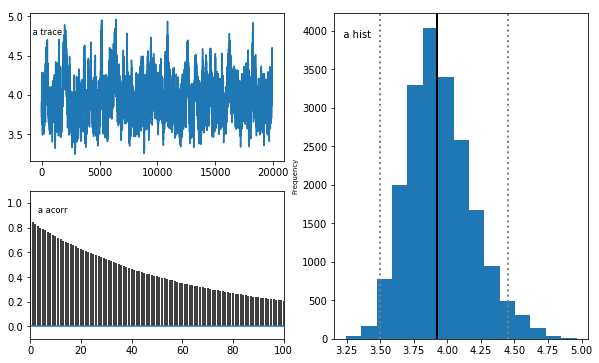

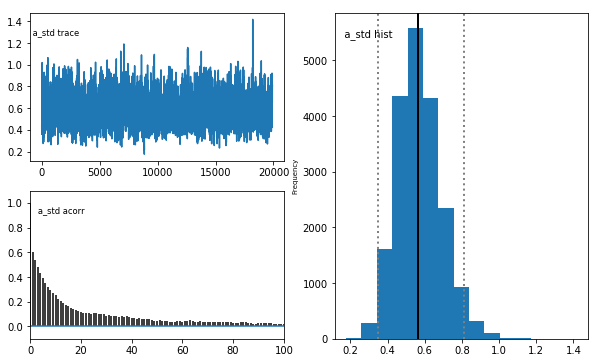

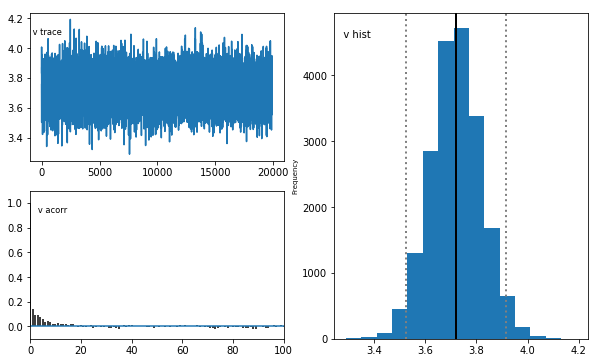

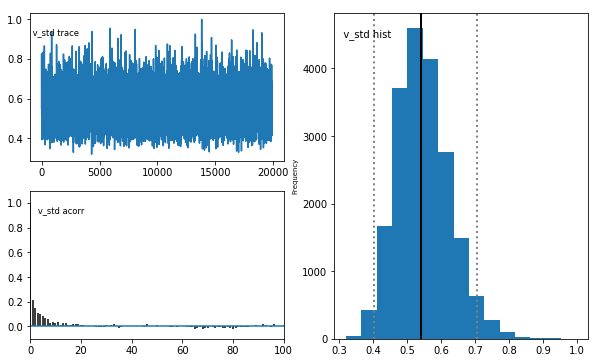

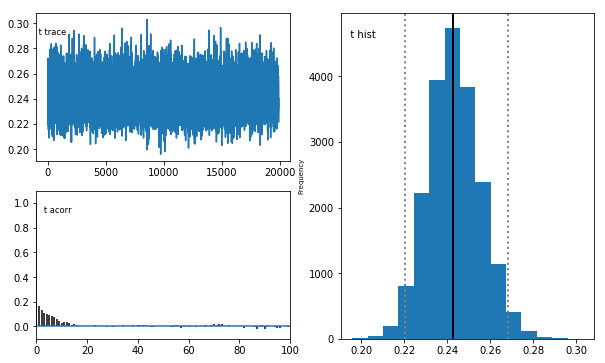

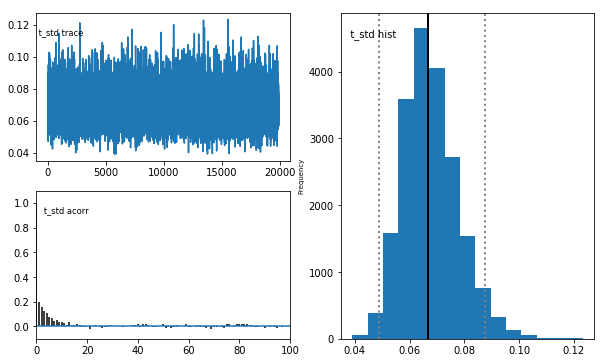

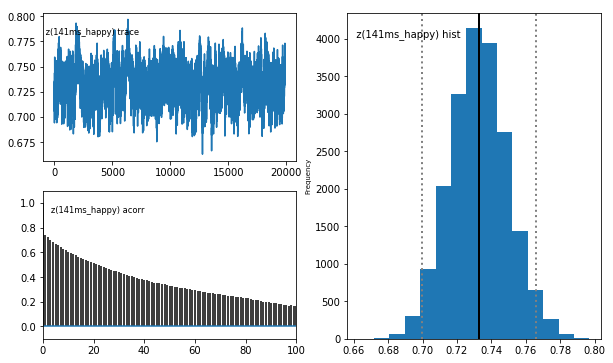

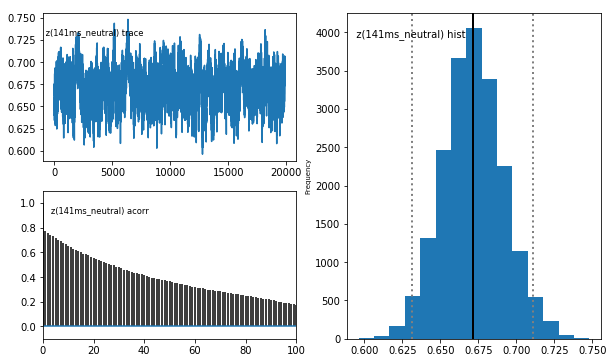

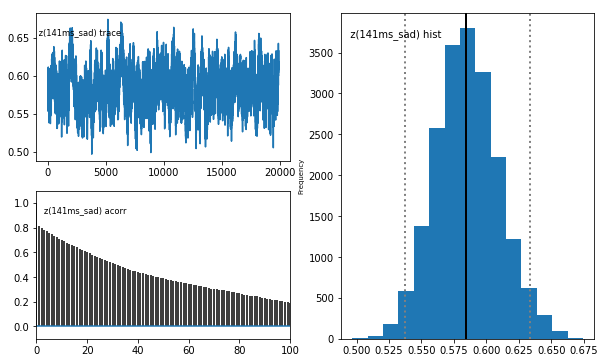

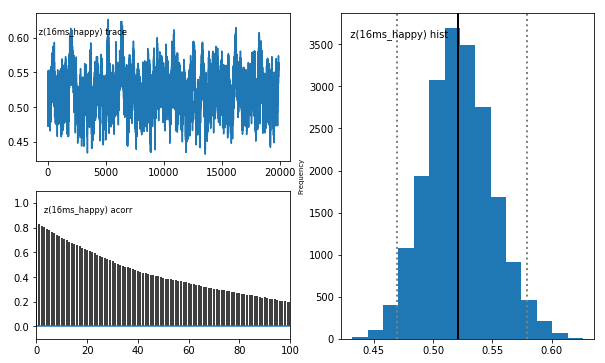

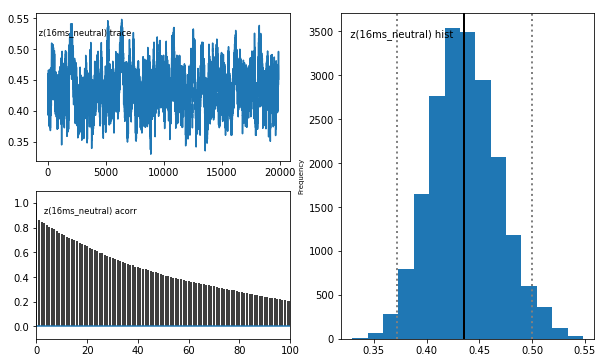

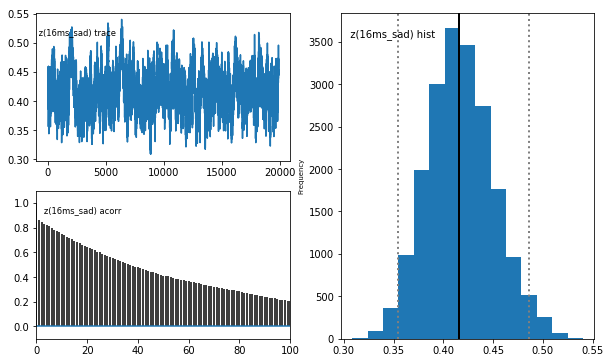

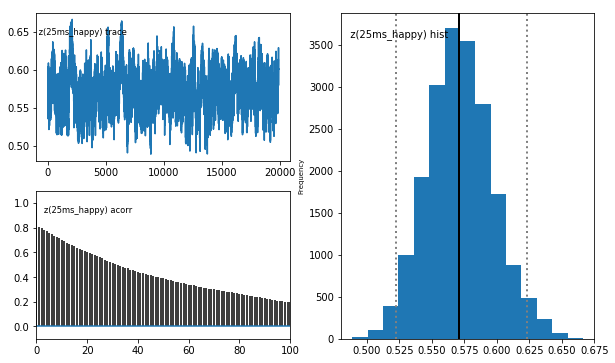

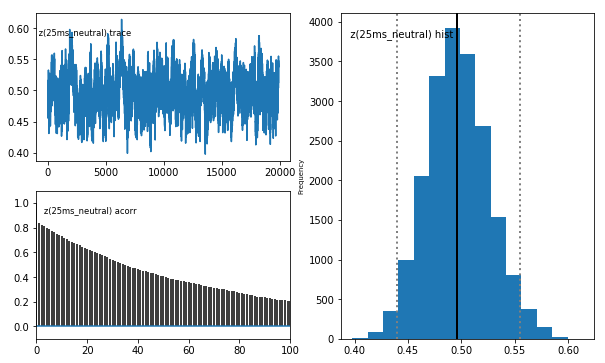

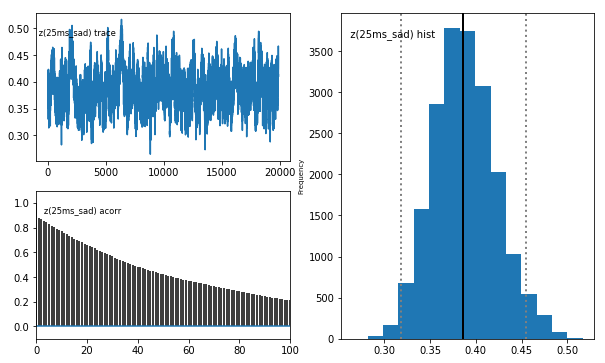

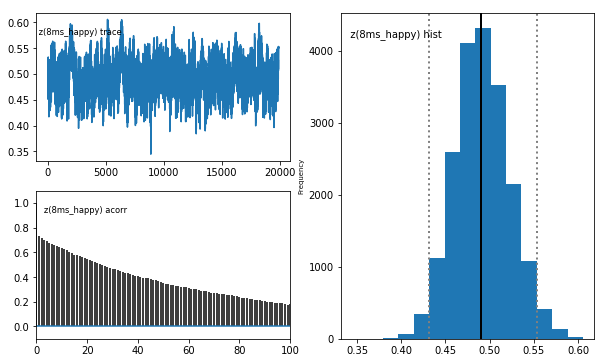

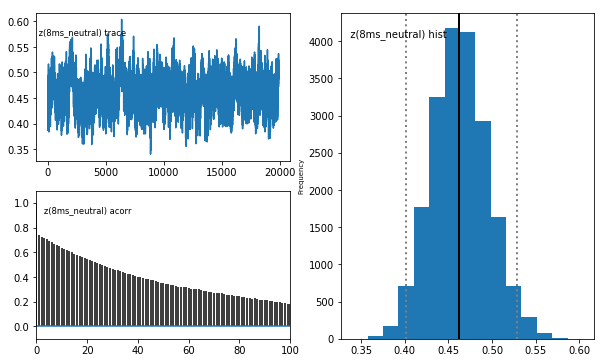

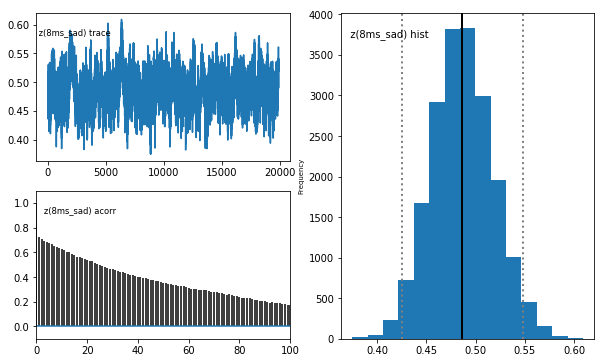

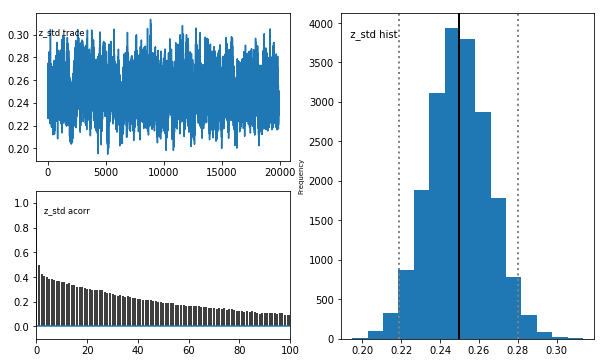

In [12]:
m_bias.plot_posteriors()

In [13]:
m_bias.print_stats()

                                 mean        std       2.5q       25q       50q        75q      97.5q       mc err
a                             3.94709   0.243524    3.53771   3.77573   3.92136    4.09383    4.50681    0.0153932
a_std                        0.570951   0.119559   0.362284  0.487568  0.561715   0.644988   0.831158   0.00372741
a_subj.0HZ                    3.73076   0.334178    3.14914   3.49447   3.70563    3.94201    4.44711    0.0140906
a_subj.1.0                     3.4495     0.3201    2.88647   3.22264   3.42511     3.6485    4.15486    0.0137092
a_subj.10.0                   4.12125   0.394493    3.43051   3.84381   4.09028    4.36828    4.97089    0.0167937
a_subj.11.0                   3.41592   0.323147    2.85081   3.18841   3.39275    3.61694    4.12464    0.0142003
a_subj.14.0                    4.0652   0.453785    3.26685   3.74911   4.03293    4.34611     5.0499    0.0174957
a_subj.15.0                   3.87998   0.365322    3.22699   3.62586   3.85597 

# Plot Bias for all conditions

(0, 30)

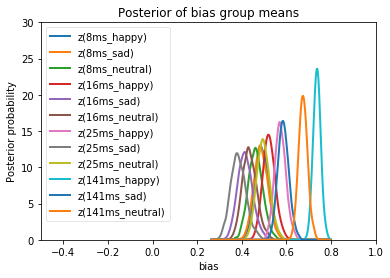

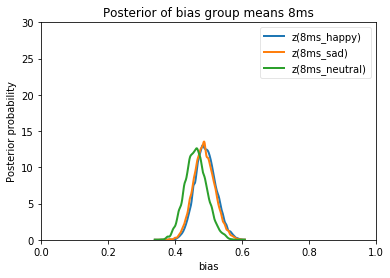

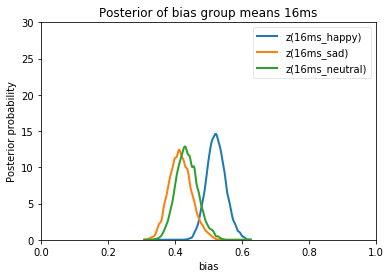

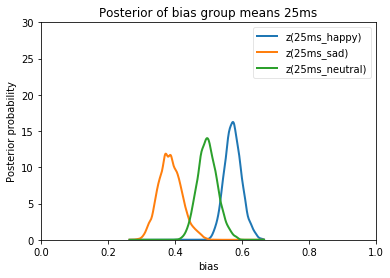

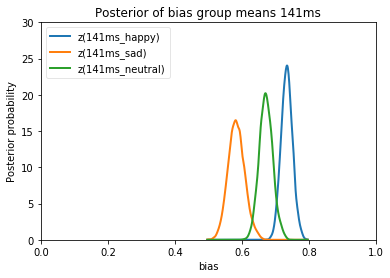

In [14]:
z_8ms_happy, z_8ms_sad, z_8ms_neutral,z_16ms_happy, z_16ms_sad, z_16ms_neutral, z_25ms_happy, z_25ms_sad, z_25ms_neutral, z_141ms_happy, z_141ms_sad, z_141ms_neutral  = m_bias.nodes_db.node[['z(8ms_happy)', 'z(8ms_sad)', 'z(8ms_neutral)','z(16ms_happy)', 'z(16ms_sad)', 'z(16ms_neutral)', 'z(25ms_happy)', 'z(25ms_sad)', 'z(25ms_neutral)', 'z(141ms_happy)', 'z(141ms_sad)', 'z(141ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([z_8ms_happy, z_8ms_sad, z_8ms_neutral,z_16ms_happy, z_16ms_sad, z_16ms_neutral, z_25ms_happy, z_25ms_sad, z_25ms_neutral, z_141ms_happy, z_141ms_sad, z_141ms_neutral])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('Posterior of bias group means')
plt.xlim(-0.5,1)
plt.ylim(0,30)

z_8ms_happy, z_8ms_sad, z_8ms_neutral= m_bias.nodes_db.node[['z(8ms_happy)', 'z(8ms_sad)', 'z(8ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([z_8ms_happy, z_8ms_sad, z_8ms_neutral])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('Posterior of bias group means 8ms')
plt.xlim(0,1)
plt.ylim(0,30)

z_16ms_happy, z_16ms_sad, z_16ms_neutral= m_bias.nodes_db.node[['z(16ms_happy)', 'z(16ms_sad)', 'z(16ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([z_16ms_happy, z_16ms_sad, z_16ms_neutral])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('Posterior of bias group means 16ms')
plt.xlim(0,1)
plt.ylim(0,30)

z_25ms_happy, z_25ms_sad, z_25ms_neutral= m_bias.nodes_db.node[['z(25ms_happy)', 'z(25ms_sad)', 'z(25ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([z_25ms_happy, z_25ms_sad, z_25ms_neutral])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('Posterior of bias group means 25ms')
plt.xlim(0,1)
plt.ylim(0,30)

z_141ms_happy, z_141ms_sad, z_141ms_neutral= m_bias.nodes_db.node[['z(141ms_happy)', 'z(141ms_sad)', 'z(141ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([z_141ms_happy, z_141ms_sad, z_141ms_neutral])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('Posterior of bias group means 141ms')
plt.xlim(0,1)
plt.ylim(0,30)


(0, 30)

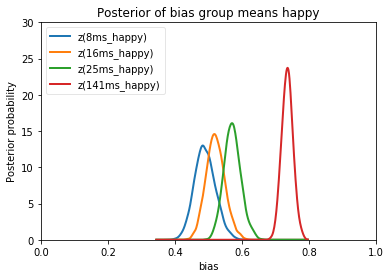

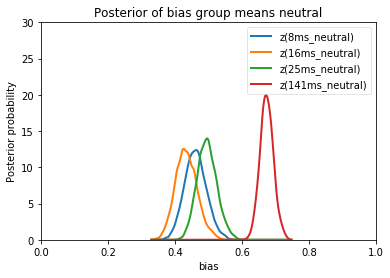

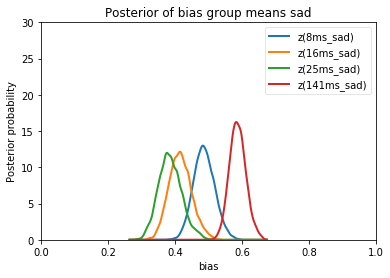

In [15]:
z_8ms_happy, z_16ms_happy, z_25ms_happy, z_141ms_happy= m_bias.nodes_db.node[['z(8ms_happy)', 'z(16ms_happy)', 'z(25ms_happy)', 'z(141ms_happy)']] 
hddm.analyze.plot_posterior_nodes([z_8ms_happy, z_16ms_happy, z_25ms_happy, z_141ms_happy])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('Posterior of bias group means happy')
plt.xlim(0,1)
plt.ylim(0,30)

z_8ms_neutral, z_16ms_neutral, z_25ms_neutral, z_141ms_neutral= m_bias.nodes_db.node[['z(8ms_neutral)', 'z(16ms_neutral)', 'z(25ms_neutral)', 'z(141ms_neutral)']] 
hddm.analyze.plot_posterior_nodes([z_8ms_neutral, z_16ms_neutral, z_25ms_neutral, z_141ms_neutral])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('Posterior of bias group means neutral')
plt.xlim(0,1)
plt.ylim(0,30)

z_8ms_sad, z_16ms_sad, z_25ms_sad, z_141ms_sad= m_bias.nodes_db.node[['z(8ms_sad)', 'z(16ms_sad)', 'z(25ms_sad)', 'z(141ms_sad)']] 
hddm.analyze.plot_posterior_nodes([z_8ms_sad, z_16ms_sad, z_25ms_sad, z_141ms_sad])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('Posterior of bias group means sad')
plt.xlim(0,1)
plt.ylim(0,30)


# Get Statistics

In [16]:
print "P(8ms_happy > 8ms_sad)=",(z_8ms_happy.trace() > z_8ms_sad.trace()).mean()
print "P(8ms_happy > 8ms_neutral)=",(z_8ms_happy.trace() > z_8ms_neutral.trace()).mean()

print "P(16ms_happy > 16ms_sad)=",(z_16ms_happy.trace() > z_16ms_sad.trace()).mean()
print "P(16ms_happy > 16ms_neutral)=",(z_16ms_happy.trace() > z_16ms_neutral.trace()).mean()

print "P(25ms_happy > 25ms_sad)=",(z_25ms_happy.trace() > z_25ms_sad.trace()).mean()
print "P(25ms_happy > 25ms_neutral)=",(z_25ms_happy.trace() > z_25ms_neutral.trace()).mean()

print "P(141ms_happy > 141ms_sad)=",(z_141ms_happy.trace() > z_141ms_sad.trace()).mean()
print "P(141ms_happy > 141ms_neutral)=",(z_141ms_happy.trace() > z_141ms_neutral.trace()).mean()

print "P(8ms_happy > 16ms_happy)=",(z_8ms_happy.trace() > z_16ms_happy.trace()).mean()
print "P(8ms_happy > 25ms_happy)=",(z_8ms_happy.trace() > z_25ms_happy.trace()).mean()
print "P(8ms_happy > 141ms_happy)=",(z_8ms_happy.trace() > z_141ms_happy.trace()).mean()
print "P(16ms_happy > 25ms_happy)=",(z_16ms_happy.trace() > z_25ms_happy.trace()).mean()
print "P(16ms_happy > 141ms_happy)=",(z_16ms_happy.trace() > z_141ms_happy.trace()).mean()
print "P(25ms_happy > 141ms_happy)=",(z_25ms_happy.trace() > z_141ms_happy.trace()).mean()

print "P(8ms_sad > 16ms_sad)=",(z_8ms_sad.trace() > z_16ms_sad.trace()).mean()
print "P(8ms_sad > 25ms_sad)=",(z_8ms_sad.trace() > z_25ms_sad.trace()).mean()
print "P(8ms_sad > 141ms_sad)=",(z_8ms_sad.trace() > z_141ms_sad.trace()).mean()
print "P(16ms_sad > 25ms_sad)=",(z_16ms_sad.trace() > z_25ms_sad.trace()).mean()
print "P(16ms_sad > 141ms_sad)=",(z_16ms_sad.trace() > z_141ms_sad.trace()).mean()
print "P(25ms_sad > 141ms_sad)=",(z_25ms_sad.trace() > z_141ms_sad.trace()).mean()

print "P(8ms_neutral > 16ms_neutral)=",(z_8ms_neutral.trace() > z_16ms_neutral.trace()).mean()
print "P(8ms_neutral > 25ms_neutral)=",(z_8ms_neutral.trace() > z_25ms_neutral.trace()).mean()
print "P(8ms_neutral > 141ms_neutral)=",(z_8ms_neutral.trace() > z_141ms_neutral.trace()).mean()
print "P(16ms_neutral > 25ms_neutral)=",(z_16ms_neutral.trace() > z_25ms_neutral.trace()).mean()
print "P(16ms_neutral > 141ms_neutral)=",(z_16ms_neutral.trace() > z_141ms_neutral.trace()).mean()
print "P(25ms_neutral > 141ms_neutral)=",(z_25ms_neutral.trace() > z_141ms_neutral.trace()).mean()

P(8ms_happy > 8ms_sad)= 0.584824120603015
P(8ms_happy > 8ms_neutral)= 0.8948241206030151
P(16ms_happy > 16ms_sad)= 1.0
P(16ms_happy > 16ms_neutral)= 1.0
P(25ms_happy > 25ms_sad)= 1.0
P(25ms_happy > 25ms_neutral)= 1.0
P(141ms_happy > 141ms_sad)= 1.0
P(141ms_happy > 141ms_neutral)= 1.0
P(8ms_happy > 16ms_happy)= 0.06251256281407035
P(8ms_happy > 25ms_happy)= 5.0251256281407036e-05
P(8ms_happy > 141ms_happy)= 0.0
P(16ms_happy > 25ms_happy)= 0.0008040201005025126
P(16ms_happy > 141ms_happy)= 0.0
P(25ms_happy > 141ms_happy)= 0.0
P(8ms_sad > 16ms_sad)= 0.9993969849246231
P(8ms_sad > 25ms_sad)= 1.0
P(8ms_sad > 141ms_sad)= 0.0
P(16ms_sad > 25ms_sad)= 0.9634673366834171
P(16ms_sad > 141ms_sad)= 0.0
P(25ms_sad > 141ms_sad)= 0.0
P(8ms_neutral > 16ms_neutral)= 0.9066834170854271
P(8ms_neutral > 25ms_neutral)= 0.047035175879396984
P(8ms_neutral > 141ms_neutral)= 0.0
P(16ms_neutral > 25ms_neutral)= 0.0
P(16ms_neutral > 141ms_neutral)= 0.0
P(25ms_neutral > 141ms_neutral)= 0.0


# Estimate Main Effects

# Model for drift-rate depending on main effects
### Gelman Rubin R Statistic for convergence check

In [17]:
#Gelman Rubin R statistic 
models = list()
for i in range(5):
    model_stim = hddm.HDDM(data, p_outlier=0.05,depends_on={'v': 'stim'})   
    model_stim.find_starting_values()
    model_stim.sample(2000, burn=20) 
    models.append(model_stim)
hddm.analyze.gelman_rubin(models)


 [-----------------100%-----------------] 2001 of 2000 complete in 254.2 sec

{'a': 1.0020812086675368,
 'a_std': 1.0175726559930125,
 'a_subj.0HZ': 1.0000689755443855,
 'a_subj.1.0': 1.012121212297265,
 'a_subj.10.0': 1.0063377831418245,
 'a_subj.11.0': 1.022040894661211,
 'a_subj.14.0': 1.0186141537417424,
 'a_subj.15.0': 1.0039600072636223,
 'a_subj.16': 1.0048920698217825,
 'a_subj.17.0': 1.0090039281429717,
 'a_subj.18': 1.0016547488064897,
 'a_subj.2.0': 1.0129950103671115,
 'a_subj.20.0': 1.006479564983228,
 'a_subj.21.0': 1.0074355294100061,
 'a_subj.22.0': 1.0004991289163954,
 'a_subj.24.0': 1.01473224312081,
 'a_subj.25.0': 1.0255925567631328,
 'a_subj.27': 1.0027318306932038,
 'a_subj.28.0': 1.0026275795792041,
 'a_subj.29': 1.0068519654508503,
 'a_subj.3': 1.0017700955628026,
 'a_subj.30.0': 1.0066774049297622,
 'a_subj.32': 1.0070857700664493,
 'a_subj.33.0': 1.0103074511604369,
 'a_subj.34.0': 1.0069284730749355,
 'a_subj.36.0': 1.004903205185094,
 'a_subj.37.0': 1.014378622126136,
 'a_subj.38.0': 1.0060652863445982,
 'a_subj.39.0': 1.0238372653404

In [18]:
#Gelman Rubin R statistic 
models = list()
for i in range(5):
    model_level = hddm.HDDM(data, p_outlier=0.05,depends_on={'v': 'level'})    #, depends_on={'v': 'stim'})
    model_level.find_starting_values()
    model_level.sample(2000, burn=20) 
    models.append(model_level)
hddm.analyze.gelman_rubin(models)


 [-----------------100%-----------------] 2000 of 2000 complete in 255.9 sec

{'a': 1.0026049122479495,
 'a_std': 1.0179728608479188,
 'a_subj.0HZ': 1.0043588204749065,
 'a_subj.1.0': 1.0056979694292272,
 'a_subj.10.0': 1.0054334995773546,
 'a_subj.11.0': 1.0124122872141517,
 'a_subj.14.0': 1.0201484208434393,
 'a_subj.15.0': 1.007717033453428,
 'a_subj.16': 1.0050854525684394,
 'a_subj.17.0': 1.007556658813456,
 'a_subj.18': 1.0042975093245354,
 'a_subj.2.0': 1.0046176832123597,
 'a_subj.20.0': 1.0076523130859236,
 'a_subj.21.0': 1.007134109594542,
 'a_subj.22.0': 1.0032469766821615,
 'a_subj.24.0': 1.0196888862287026,
 'a_subj.25.0': 1.0095896056546736,
 'a_subj.27': 1.0001553505877763,
 'a_subj.28.0': 1.0169665197471167,
 'a_subj.29': 1.0006245675276075,
 'a_subj.3': 1.0059218310883327,
 'a_subj.30.0': 1.0110617552298935,
 'a_subj.32': 1.0017134161219685,
 'a_subj.33.0': 1.0023605120059595,
 'a_subj.34.0': 1.0037043838429833,
 'a_subj.36.0': 1.0281800521123845,
 'a_subj.37.0': 1.0127247851314907,
 'a_subj.38.0': 1.0297446751268162,
 'a_subj.39.0': 1.017021939

Plotting a
Plotting a_std
Plotting v(happy)
Plotting v(neutral)
Plotting v(sad)
Plotting v_std
Plotting t
Plotting t_std


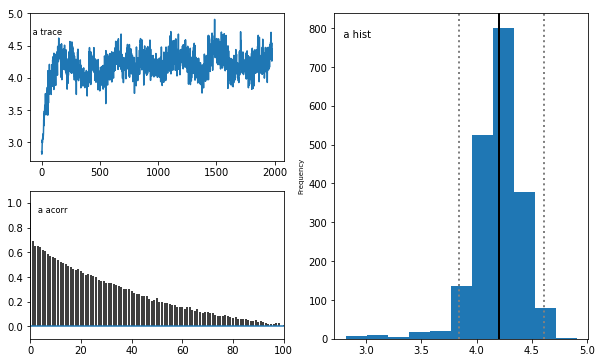

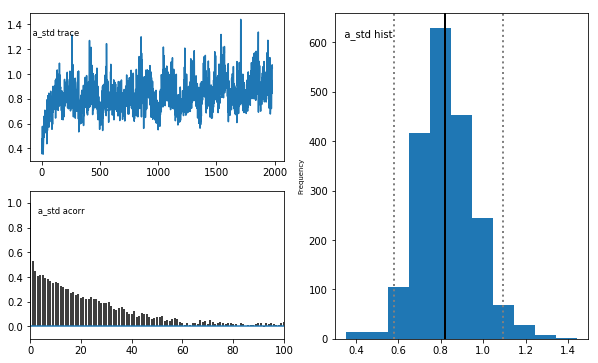

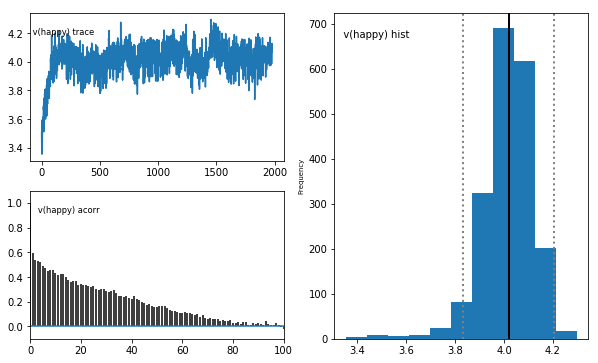

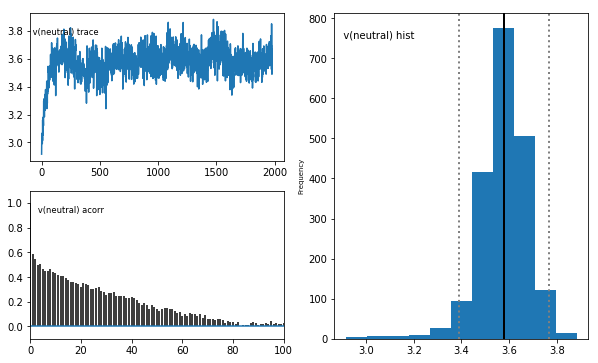

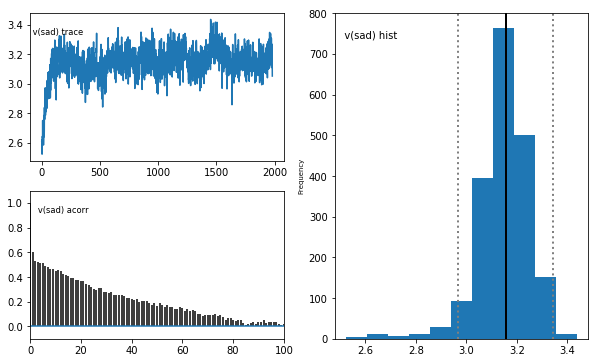

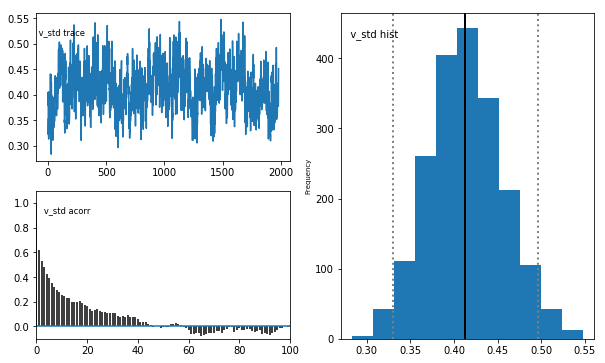

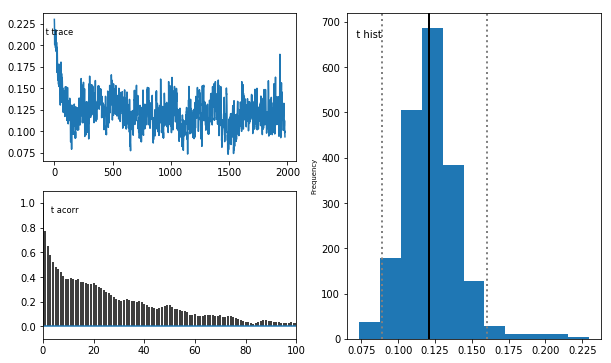

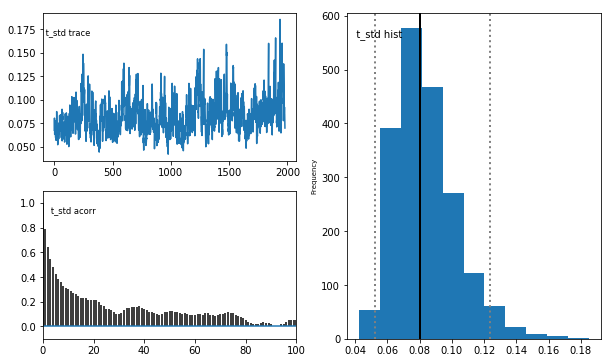

In [19]:
model_stim.plot_posteriors()

In [20]:
model_stim.print_stats()

                           mean        std        2.5q        25q        50q        75q      97.5q      mc err
a                        4.1913   0.228066      3.6608    4.08332    4.20611    4.32368    4.56608     0.01879
a_std                  0.828092   0.132984    0.592439   0.739346   0.820678   0.906587    1.12312  0.00894544
a_subj.0HZ               3.3352    0.32573     2.64356    3.11778    3.35717     3.5784    3.89546   0.0279937
a_subj.1.0              3.49091   0.349705     2.81132    3.24423    3.47143    3.74542    4.18385   0.0312965
a_subj.10.0             4.36421   0.362869     3.64134    4.15595    4.36727    4.59841    5.04345   0.0312746
a_subj.11.0             3.65972   0.416274     2.89032    3.36597    3.64757    3.90838     4.5699   0.0376317
a_subj.14.0             3.16866   0.375691     2.48705    2.93097    3.14748     3.3762    3.93974   0.0323131
a_subj.15.0             4.06327   0.363871     3.29345    3.81378    4.07299    4.31661     4.6976   0.0310981
a

Plotting a
Plotting a_std
Plotting v(141ms)
Plotting v(16ms)
Plotting v(25ms)
Plotting v(8ms)
Plotting v_std
Plotting t
Plotting t_std


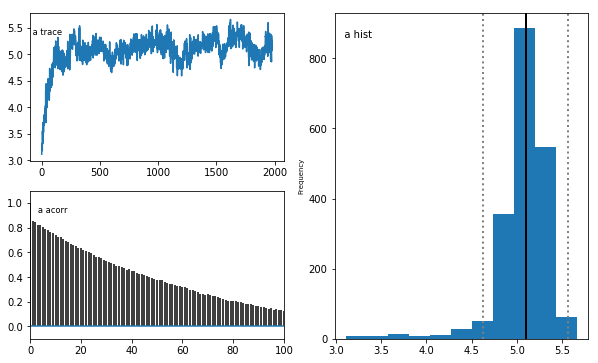

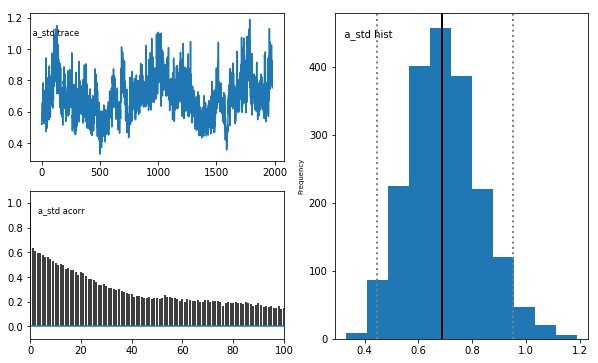

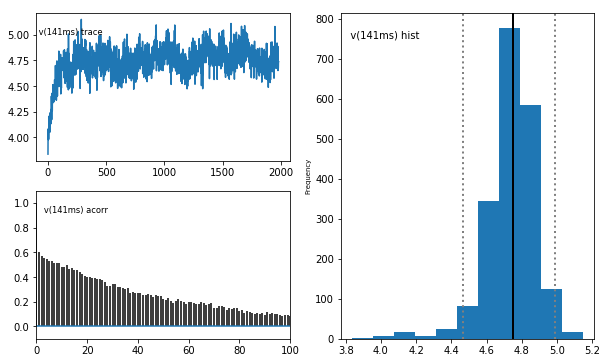

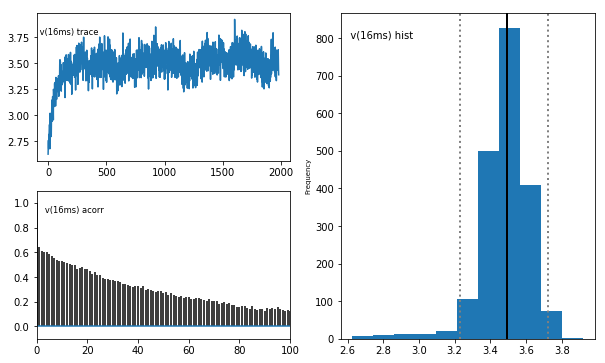

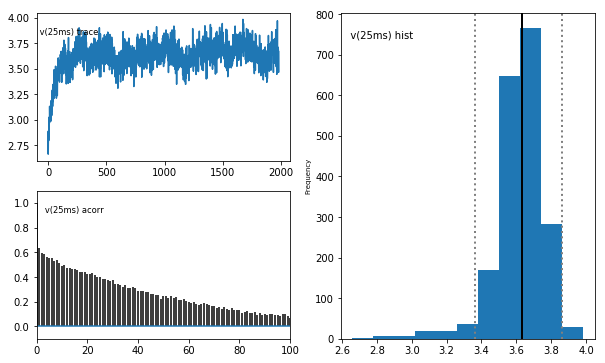

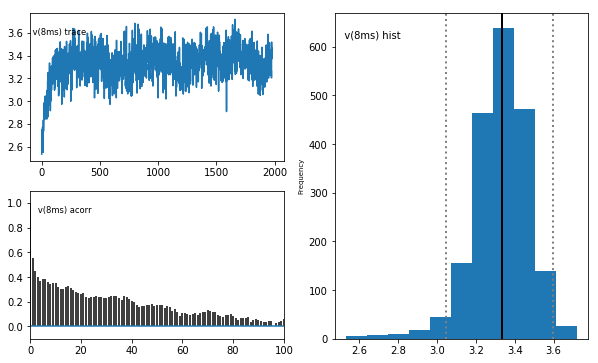

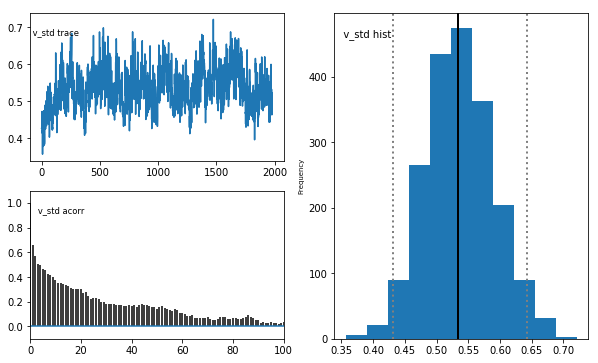

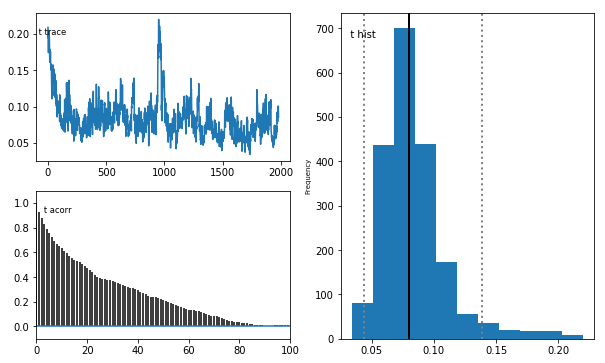

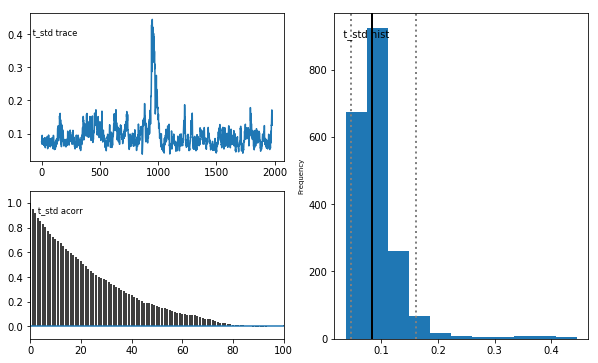

In [21]:
model_level.plot_posteriors()

In [22]:
model_level.print_stats()

                         mean        std         2.5q         25q         50q        75q      97.5q      mc err
a                     5.06557   0.290275      4.28889     4.97039     5.10423    5.22599     5.4576    0.027221
a_std                0.696141   0.133182     0.464982     0.60574    0.686141   0.779239   0.983551   0.0100549
a_subj.0HZ            4.69037   0.288207      3.99255     4.53792     4.72804    4.87985    5.15234   0.0241447
a_subj.1.0            4.35594    0.40081      3.54495     4.07792     4.35925    4.66597    5.03696   0.0366962
a_subj.10.0            5.0844   0.336626      4.29155      4.9259     5.12218    5.30167    5.61976   0.0279422
a_subj.11.0           4.86574   0.498247      3.78104     4.55885     4.89516    5.19982     5.7665   0.0462328
a_subj.14.0           5.05048   0.570652      3.54914     4.78537      5.1024     5.4066    5.95152    0.053372
a_subj.15.0           4.78808   0.323515      4.03184     4.61942     4.83667    5.01043     5.2786   0.

# Plot drift-rate for main effects

In [23]:
import matplotlib.pyplot

(0, 6)

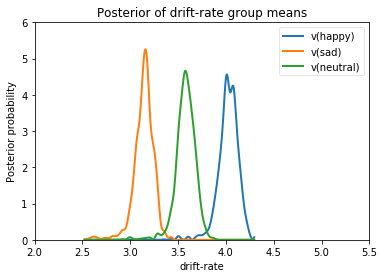

In [38]:
v_happy, v_sad, v_neutral = model_stim.nodes_db.node[['v(happy)', 'v(sad)', 'v(neutral)']] 
hddm.analyze.plot_posterior_nodes([v_happy, v_sad, v_neutral])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')
plt.xlim(2,5.5)
plt.ylim(0,6)

(0, 6)

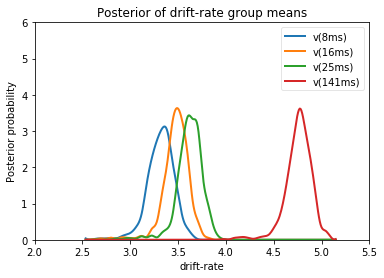

In [39]:
v_8ms, v_16ms, v_25ms, v_141ms = model_level.nodes_db.node[['v(8ms)', 'v(16ms)', 'v(25ms)', 'v(141ms)']] 
hddm.analyze.plot_posterior_nodes([v_8ms, v_16ms, v_25ms, v_141ms])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')
plt.xlim(2,5.5)
plt.ylim(0,6)

# Get Statistics

In [26]:
print "P(happy > sad)=",(v_happy.trace() > v_sad.trace()).mean()
print "P(sad > happy)=",(v_sad.trace() > v_happy.trace()).mean()
print "P(happy > neutral)=",(v_happy.trace() > v_neutral.trace()).mean()
print "P(sad > neutral)=",(v_sad.trace() > v_neutral.trace()).mean()

P(happy > sad)= 1.0
P(sad > happy)= 0.0
P(happy > neutral)= 1.0
P(sad > neutral)= 0.0


In [27]:
print "P(8ms > 16ms) =",(v_8ms.trace() > v_16ms.trace()).mean()
print "P(8ms > 25ms) =",(v_8ms.trace() > v_25ms.trace()).mean()
print "P(16ms > 25ms) =",(v_16ms.trace() > v_25ms.trace()).mean()
print "P(25ms > 141ms) =",(v_25ms.trace() > v_141ms.trace()).mean()
print "P(16ms > 141ms) =",(v_16ms.trace() > v_141ms.trace()).mean()
print "P(8ms > 141ms) =",(v_8ms.trace() > v_141ms.trace()).mean()

P(8ms > 16ms) = 0.13434343434343435
P(8ms > 25ms) = 0.018686868686868686
P(16ms > 25ms) = 0.13333333333333333
P(25ms > 141ms) = 0.0
P(16ms > 141ms) = 0.0
P(8ms > 141ms) = 0.0


# Model for bias depending on main effects
### Gelman Rubin R Statistic for convergence check

In [28]:
models = list()
for i in range(5):
    model_level_bias = hddm.HDDM(data, bias = True, p_outlier=0.05, depends_on={'z': 'level'})    
    model_level_bias.find_starting_values()
    model_level_bias.sample(100000, burn=500, thin=5) 
    models.append(model_level_bias)
hddm.analyze.gelman_rubin(models)

 [-----------------100%-----------------] 100000 of 100000 complete in 17601.1 sec

{'a': 1.0076326598133536,
 'a_std': 1.0011733746801814,
 'a_subj.0HZ': 1.0050457325916853,
 'a_subj.1.0': 1.0053102463394565,
 'a_subj.10.0': 1.005498040854791,
 'a_subj.11.0': 1.0048391528180665,
 'a_subj.14.0': 1.0028336452026168,
 'a_subj.15.0': 1.0042694251546866,
 'a_subj.16': 1.0046220595917543,
 'a_subj.17.0': 1.004601519880472,
 'a_subj.18': 1.0046335873198582,
 'a_subj.2.0': 1.005042999001094,
 'a_subj.20.0': 1.0054733156444642,
 'a_subj.21.0': 1.0038639743014734,
 'a_subj.22.0': 1.0042558380340083,
 'a_subj.24.0': 1.0037683045890167,
 'a_subj.25.0': 1.00230730785255,
 'a_subj.27': 1.0046707358869045,
 'a_subj.28.0': 1.0042710540761925,
 'a_subj.29': 1.0038004911277987,
 'a_subj.3': 1.0033204920372893,
 'a_subj.30.0': 1.0045593624013123,
 'a_subj.32': 1.0031598470858152,
 'a_subj.33.0': 1.0047821675587854,
 'a_subj.34.0': 1.0042373718365496,
 'a_subj.36.0': 1.0041023675294263,
 'a_subj.37.0': 1.002822890405634,
 'a_subj.38.0': 1.0028045372518815,
 'a_subj.39.0': 1.003562667894

In [29]:
models = list()
for i in range(5):
    model_stim_bias = hddm.HDDM(data, bias=True, p_outlier=0.05, depends_on={'z': 'stim'})   
    model_stim_bias.find_starting_values()
    model_stim_bias.sample(100000, burn=500, thin=5) 
    models.append(model_stim_bias)
hddm.analyze.gelman_rubin(models)

 [-----------------100%-----------------] 100000 of 100000 complete in 16870.1 sec

{'a': 1.0209672370468048,
 'a_std': 1.0062305353756562,
 'a_subj.0HZ': 1.0108049117009763,
 'a_subj.1.0': 1.0125162797970306,
 'a_subj.10.0': 1.0120707860926643,
 'a_subj.11.0': 1.0111004176277345,
 'a_subj.14.0': 1.0063637940947447,
 'a_subj.15.0': 1.0099086789289795,
 'a_subj.16': 1.0135275829246178,
 'a_subj.17.0': 1.0099930024113923,
 'a_subj.18': 1.012137723026325,
 'a_subj.2.0': 1.0118875081980725,
 'a_subj.20.0': 1.0116347769034568,
 'a_subj.21.0': 1.0128446181842365,
 'a_subj.22.0': 1.0132614871449344,
 'a_subj.24.0': 1.0086509073671432,
 'a_subj.25.0': 1.0078903946987847,
 'a_subj.27': 1.0135620146987576,
 'a_subj.28.0': 1.0051840292196352,
 'a_subj.29': 1.0137168921156074,
 'a_subj.3': 1.0121004965425011,
 'a_subj.30.0': 1.0090374350725437,
 'a_subj.32': 1.01136657388896,
 'a_subj.33.0': 1.0122294258776663,
 'a_subj.34.0': 1.0130804879495063,
 'a_subj.36.0': 1.0097038499256206,
 'a_subj.37.0': 1.0073858130621918,
 'a_subj.38.0': 1.0100961883185862,
 'a_subj.39.0': 1.009310627

Plotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t
Plotting t_std
Plotting z(happy)
Plotting z(neutral)
Plotting z(sad)
Plotting z_std


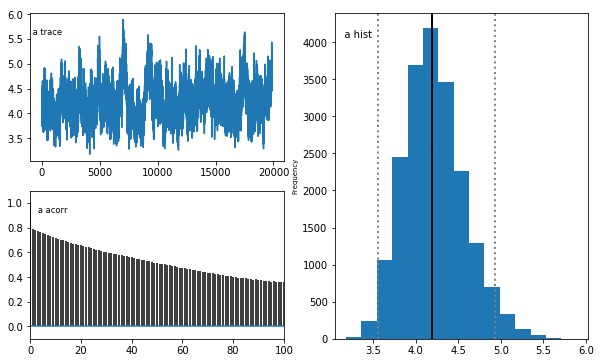

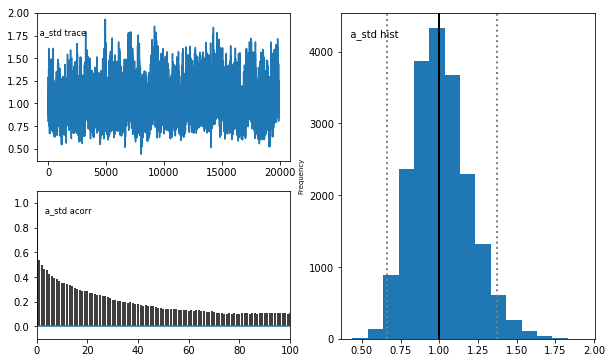

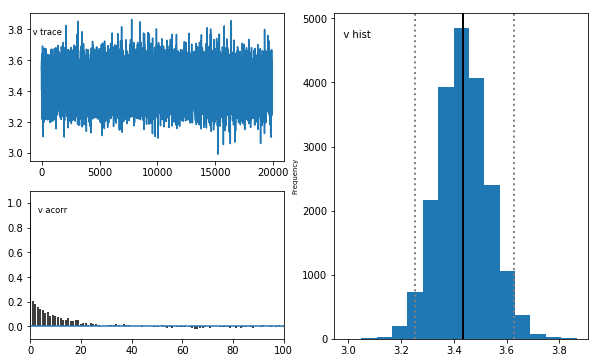

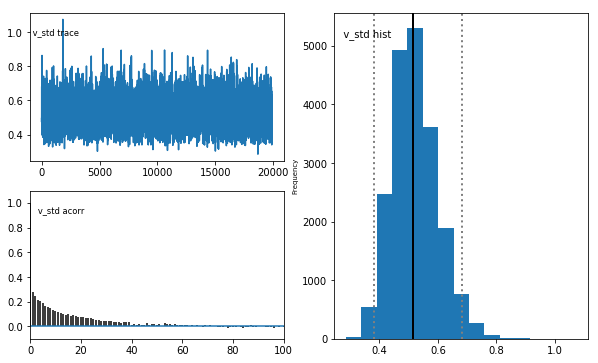

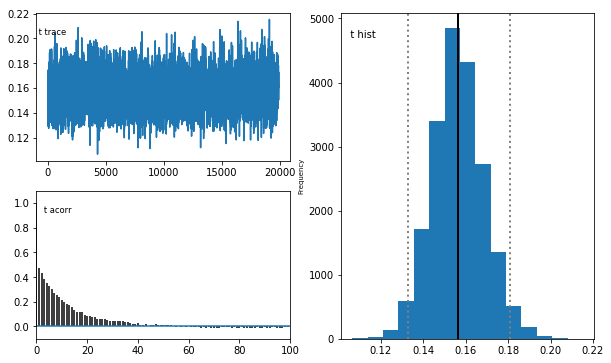

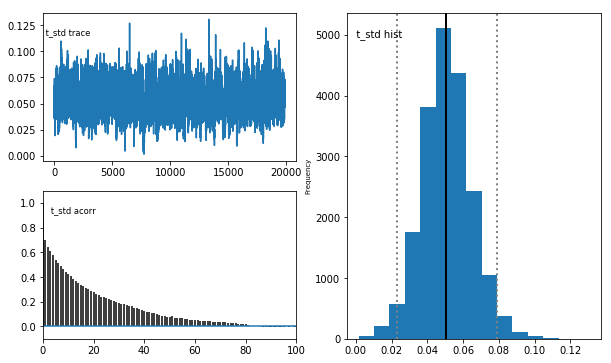

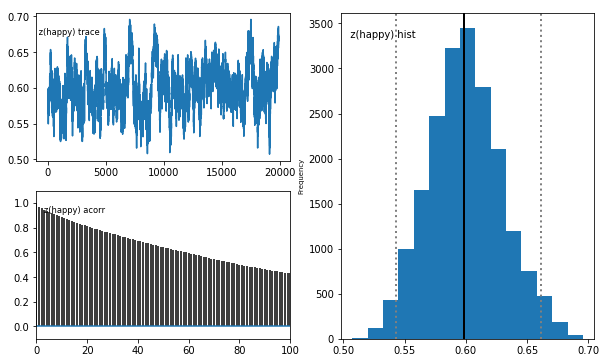

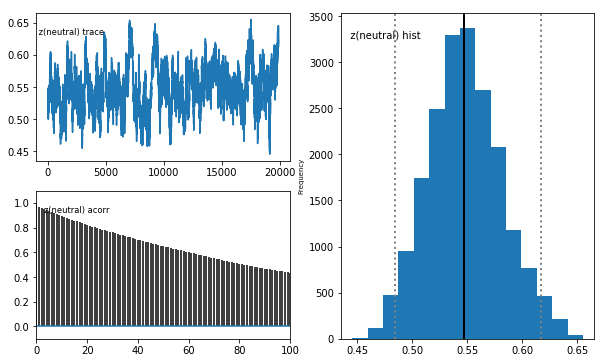

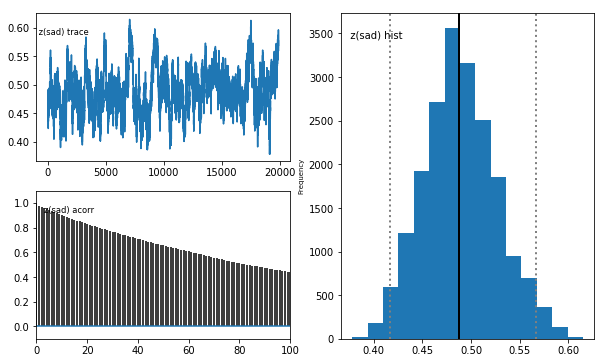

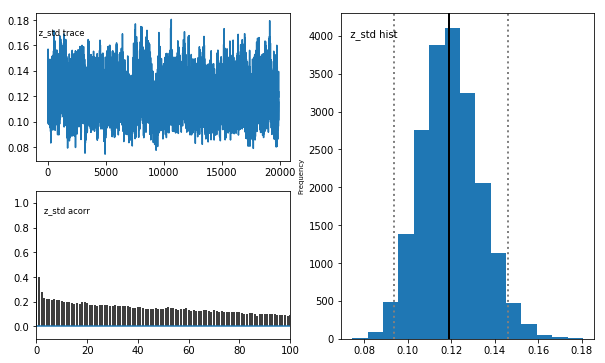

In [30]:
model_stim_bias.plot_posteriors()

In [31]:
model_stim_bias.print_stats()

                           mean        std       2.5q        25q        50q        75q      97.5q       mc err
a                       4.21894   0.354391     3.6061    3.96822    4.19168    4.43525     5.0012     0.025176
a_std                   1.01037    0.18381   0.692251   0.879945   0.996013     1.1233    1.41149   0.00782244
a_subj.0HZ              2.81342   0.307339    2.31389    2.59481    2.77595    2.99621    3.51055    0.0144007
a_subj.1.0               3.4014   0.409977    2.68913    3.10908    3.37079    3.65855    4.29959    0.0210436
a_subj.10.0             4.10758   0.494926    3.24632    3.75955    4.07121    4.40968     5.1963    0.0265391
a_subj.11.0             3.42013   0.459678    2.63879    3.09278    3.38132    3.70317    4.41222    0.0220845
a_subj.14.0             3.10922   0.484079    2.28879    2.76072    3.07146    3.40961    4.17826    0.0196164
a_subj.15.0             3.69971    0.43353    2.95369    3.38924    3.66587    3.97402    4.63736    0.0221967
a

Plotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t
Plotting t_std
Plotting z(141ms)
Plotting z(16ms)
Plotting z(25ms)
Plotting z(8ms)
Plotting z_std


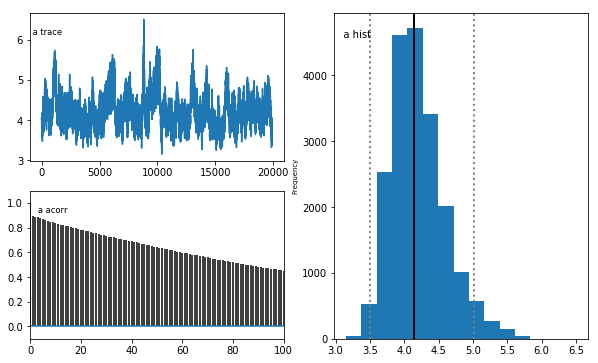

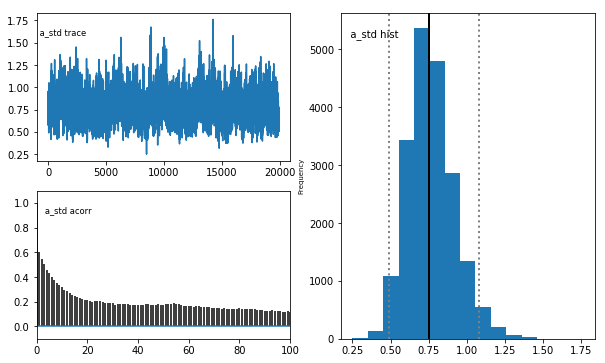

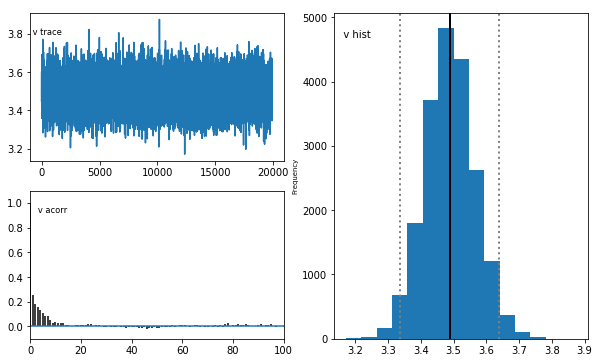

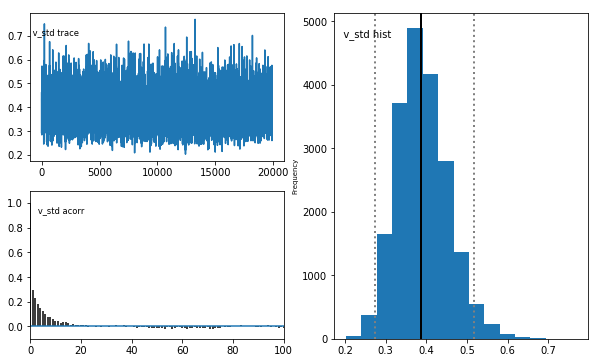

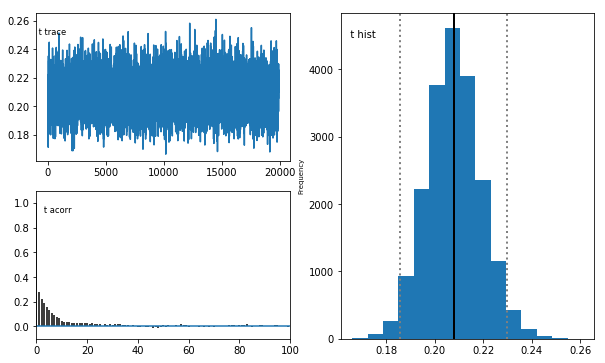

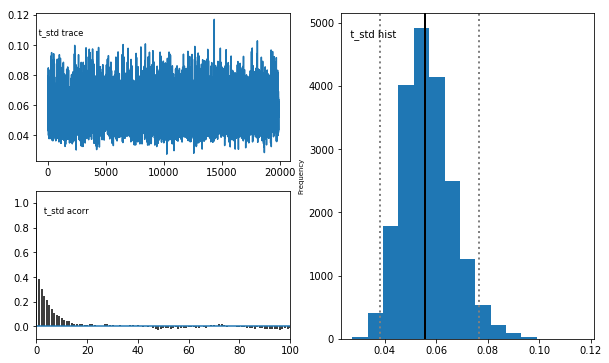

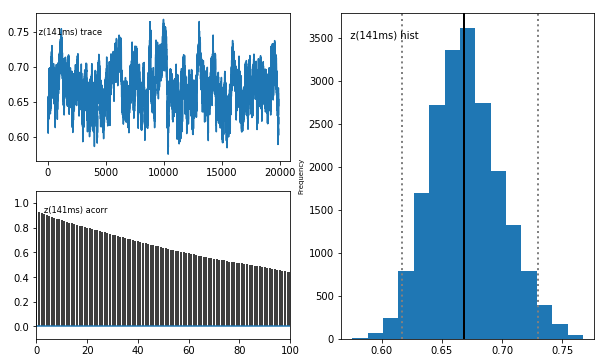

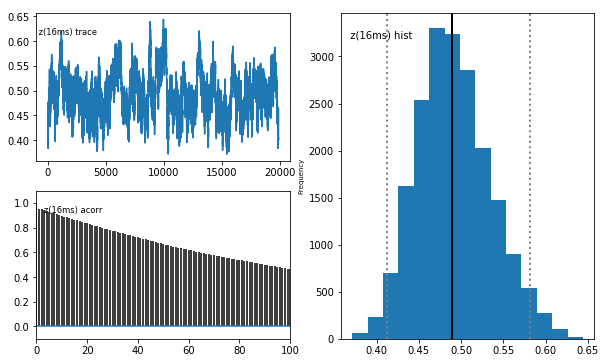

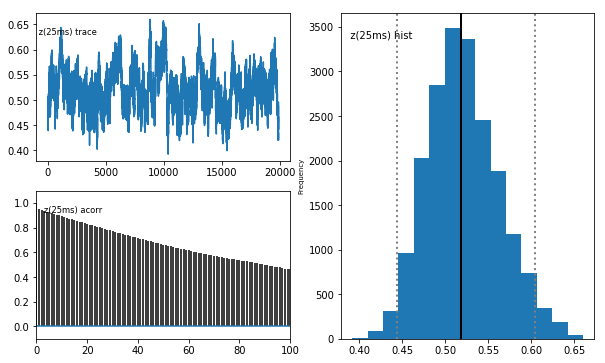

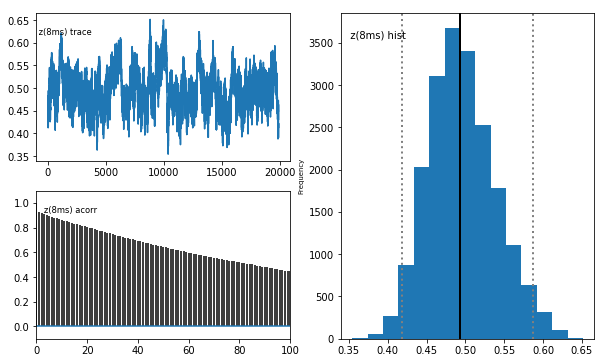

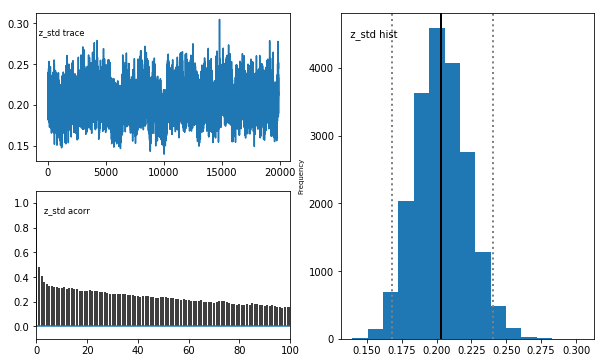

In [32]:
model_level_bias.plot_posteriors()

In [33]:
model_level_bias.print_stats()

                         mean        std       2.5q        25q        50q        75q      97.5q       mc err
a                     4.20145   0.393994    3.58518    3.92222    4.14571    4.42513     5.1471    0.0301108
a_std                0.767256   0.154155   0.506351   0.660096   0.753186   0.857785    1.11083   0.00670142
a_subj.0HZ            3.77077   0.452284    3.01844    3.44701    3.72281    4.04153     4.7898    0.0268288
a_subj.1.0            3.62424   0.448482    2.89536    3.30672    3.57614    3.88147    4.64912     0.025997
a_subj.10.0           4.30694   0.543138    3.40429     3.9215    4.25199     4.6297    5.54776    0.0330533
a_subj.11.0           3.62955   0.448114    2.87935    3.31478    3.58441    3.89785    4.64736     0.025687
a_subj.14.0           3.93253   0.547294    3.00825     3.5513    3.88194    4.25662    5.14877    0.0287511
a_subj.15.0           4.21209   0.538015    3.31792    3.83304     4.1538    4.53092    5.45352    0.0317533
a_subj.16          

# Plot bias for main effects

(0, 22)

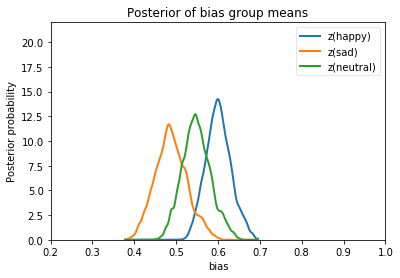

In [34]:
z_happy, z_sad, z_neutral = model_stim_bias.nodes_db.node[['z(happy)', 'z(sad)', 'z(neutral)']] 
hddm.analyze.plot_posterior_nodes([z_happy, z_sad, z_neutral])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('Posterior of bias group means')
plt.xlim(0.2,1)
plt.ylim(0,22)

(0, 22)

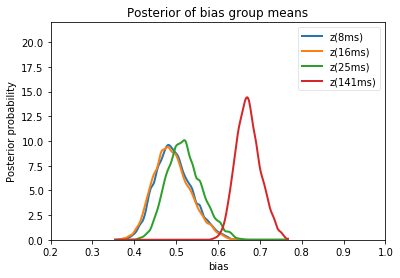

In [35]:
z_8ms, z_16ms, z_25ms, z_141ms = model_level_bias.nodes_db.node[['z(8ms)', 'z(16ms)', 'z(25ms)', 'z(141ms)']] 
hddm.analyze.plot_posterior_nodes([z_8ms, z_16ms, z_25ms, z_141ms])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('Posterior of bias group means')
plt.xlim(0.2,1)
plt.ylim(0,22)

# Get Statistics

In [36]:
print "P(happy > sad)=",(z_happy.trace() > z_sad.trace()).mean()
print "P(sad > happy)=",(z_sad.trace() > z_happy.trace()).mean()
print "P(happy > neutral)=",(z_happy.trace() > z_neutral.trace()).mean()
print "P(sad > neutral)=",(z_sad.trace() > z_neutral.trace()).mean()

P(happy > sad)= 1.0
P(sad > happy)= 0.0
P(happy > neutral)= 1.0
P(sad > neutral)= 0.0


In [37]:
print "P(8ms > 16ms)=",(z_8ms.trace() > z_16ms.trace()).mean()
print "P(8ms > 25ms)=",(z_8ms.trace() > z_25ms.trace()).mean()
print "P(8ms > 141ms)=",(z_8ms.trace() > z_141ms.trace()).mean()
print "P(16ms > 25ms)=",(z_16ms.trace() > z_25ms.trace()).mean()
print "P(16ms > 141ms)=",(z_16ms.trace() > z_141ms.trace()).mean()
print "P(25ms > 141ms)=",(z_25ms.trace() > z_141ms.trace()).mean()

P(8ms > 16ms)= 0.6050753768844221
P(8ms > 25ms)= 0.04723618090452261
P(8ms > 141ms)= 0.0
P(16ms > 25ms)= 0.009195979899497487
P(16ms > 141ms)= 0.0
P(25ms > 141ms)= 0.0
